![](../src/image/meli3.JPG)

# Entrenamiento, y Modelado y Validacion del Classifier

#### Ya teniendo en nuestro embedding de la data fuente, realizaremos el entrenamiento de 3 modelos de Clasificacion, RandomForest, SVMClassifier y el XGBOOST. para ver cual de ellos nos clasifica mejor.


### Pasos
1. [Preparacion de la data.](#1)
1. [Modelado y entrenamiento](#2)
1. [Validacion](#3)

<a id="1"></a> <br>
# 1. Preparacion de la Data

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from ast import literal_eval


In [42]:
#Leo los datos ya procesados con los embeddings de 3-small
df_270 = pd.read_csv("../src/data/processed/data_embedding_270.csv")


In [43]:
df_270["embedding"] = df_270.embedding.apply(literal_eval).apply(np.array)
print(df_270.shape)
df_270.head(2)

(210, 23)


,Unnamed: 0,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,...,category_id,category_name,Kmeans,AgC,products,Siglas_lt,Lt,mix,tokens,embedding
0,0,2024-08-01,7ef2f8612c,Cabecera Queen Size Dicasa Aries Gris,red,1,Otro,new,0,3699.00,...,FURNITURE,MUEBLES,3.0,0.0,11.0,Otro,Otro,Stock: 1; Refurbished: 0; Logistic: Otro; Cond...,34,"[-0.032292187213897705, 0.017587708309292793, ..."
1,1,2024-08-01,f47a79fba8,Reproduccion Medallas Americanas Antiguas,green,1,Otro,used,0,1364.58,...,OTHER,OTROS,3.0,0.0,14.0,Otro,Otro,Stock: 1; Refurbished: 0; Logistic: Otro; Cond...,31,"[-0.03797304257750511, 0.024722589179873466, -..."


In [44]:
# Separo la data de validacion de la train y test,
df_val=df_270[df_270['Kmeans'].isnull()]
print(df_val.shape)
df_270=df_270[df_270['Kmeans'].isnull()==False]
print(df_270[df_270['Kmeans'].isnull()] )# Valido que ninguno no tengan datos con valores en la etiqueta
df270 = df_270.iloc[np.random.permutation(len(df_270))].reset_index(drop=True)
df_270.head(2)

(10, 23)
Empty DataFrame
Columns: [Unnamed: 0, tim_day, seller_nickname, titulo, seller_reputation, stock, logistic_type, condition, is_refurbished, price, regular_price, categoria, url, category_id, category_name, Kmeans, AgC, products, Siglas_lt, Lt, mix, tokens, embedding]
Index: []

[0 rows x 23 columns]


,Unnamed: 0,tim_day,seller_nickname,titulo,seller_reputation,stock,logistic_type,condition,is_refurbished,price,...,category_id,category_name,Kmeans,AgC,products,Siglas_lt,Lt,mix,tokens,embedding
0,0,2024-08-01,7ef2f8612c,Cabecera Queen Size Dicasa Aries Gris,red,1,Otro,new,0,3699.00,...,FURNITURE,MUEBLES,3.0,0.0,11.0,Otro,Otro,Stock: 1; Refurbished: 0; Logistic: Otro; Cond...,34,"[-0.032292187213897705, 0.017587708309292793, ..."
1,1,2024-08-01,f47a79fba8,Reproduccion Medallas Americanas Antiguas,green,1,Otro,used,0,1364.58,...,OTHER,OTROS,3.0,0.0,14.0,Otro,Otro,Stock: 1; Refurbished: 0; Logistic: Otro; Cond...,31,"[-0.03797304257750511, 0.024722589179873466, -..."


In [45]:
# Obtenemos los datos de entrenamiento y de test

x_train,x_test,y_train,y_test = train_test_split(
    list(df_270.embedding.values),df_270.Kmeans,test_size=20,random_state=13
)

df_270['Kmeans'].value_counts()

Kmeans
3.0    50
2.0    50
1.0    50
0.0    50
Name: count, dtype: int64

<a id="2"></a> <br>
# 2. Modelado y entrenamiento.

# RANDOM-FOREST - CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.40      0.25      0.31         8
         1.0       0.43      0.43      0.43         7
         2.0       0.00      0.00      0.00         3
         3.0       0.67      1.00      0.80         2

    accuracy                           0.35        20
   macro avg       0.37      0.42      0.38        20
weighted avg       0.38      0.35      0.35        20



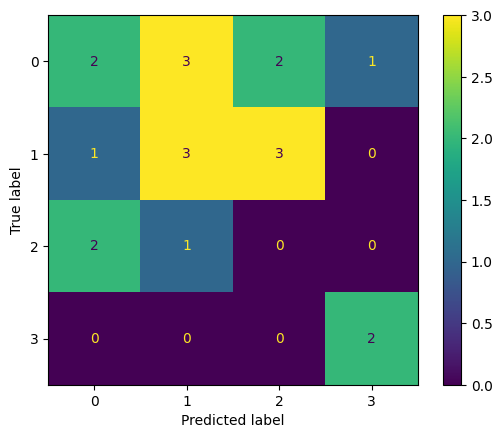

In [46]:
# Modelado, Entrenamiento, Evaluacion
clf = RandomForestClassifier(n_estimators=100) #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones
probas = clf.predict_proba(x_test) #realizamos las probabilidades

report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

In [47]:
#Prediccion
print(df_val.shape)

(10, 23)


## SUPPORT VECTOR MACHINE - CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.00      0.00      0.00         7
         2.0       0.07      0.33      0.11         3
         3.0       0.67      1.00      0.80         2

    accuracy                           0.15        20
   macro avg       0.18      0.33      0.23        20
weighted avg       0.08      0.15      0.10        20



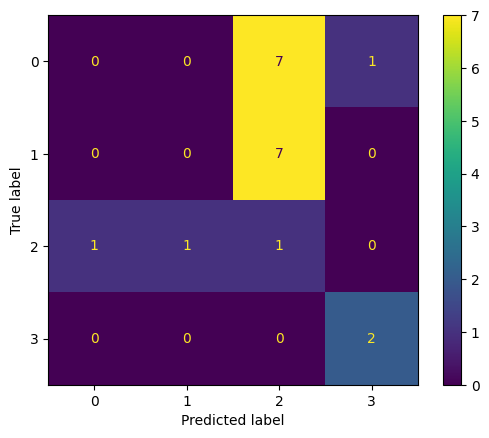

In [48]:
# Modelado, Entrenamiento, Evaluacion
clf = SVC() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

# XGBOOST - CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.50      0.38      0.43         8
         1.0       0.50      0.57      0.53         7
         2.0       0.00      0.00      0.00         3
         3.0       0.67      1.00      0.80         2

    accuracy                           0.45        20
   macro avg       0.42      0.49      0.44        20
weighted avg       0.44      0.45      0.44        20



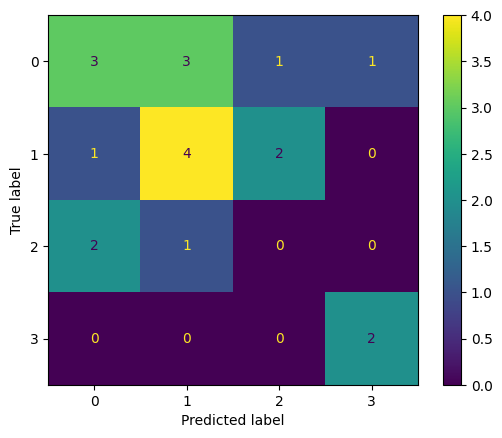

In [49]:
# Modelado, Entrenamiento, Evaluacion
clf = XGBClassifier() #iniciamos el modelo
clf.fit(x_train, y_train) #entrenamos el modelo
predicts = clf.predict(x_test) #realizamos las predicciones


report = classification_report(y_test, predicts)
print(report)
matrix = confusion_matrix(y_pred= predicts ,y_true= y_test)
disp=ConfusionMatrixDisplay(matrix)
disp.plot()

<a id="3"></a> <br>
# 3. Validacion

#### EL mejor score con la data completa fue el modelo Xboost Clasifier, aca el embeding tiene las variables categoricas, aunque sigue siendo un resultado muy deficiente.

In [50]:
# Utilizaremos el Random Forest para predecir los nuevos clusters

